In [1]:
pip install pyswarm


Note: you may need to restart the kernel to use updated packages.


In [67]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy import stats

from pyswarm import pso

In [68]:
data  = pd.read_csv('litconcdata.csv')
print(data.head())

   Cement   Blast Furnance Slag  Fly Ash  Water  Limestone Powder  \
0    540.0                  0.0      0.0  162.0               0.0   
1    540.0                  0.0      0.0  162.0               0.0   
2    332.5                142.5      0.0  228.0               0.0   
3    332.5                142.5      0.0  228.0               0.0   
4    198.6                132.4      0.0  192.0               0.0   

   Silica Fume  Quartz Powder  Superplasticizer  Coarse Aggregate   Fiber  \
0          0.0            0.0               2.5             1040.0    0.0   
1          0.0            0.0               2.5             1055.0    0.0   
2          0.0            0.0               0.0              932.0    0.0   
3          0.0            0.0               0.0              932.0    0.0   
4          0.0            0.0               0.0              978.4    0.0   

   Nano-Silica  Fine Aggregate  Age  Compressive Strength  
0          0.0           676.0   28                 79.99  
1 

In [69]:
#shape of the data
print(data.shape)

(3745, 14)


In [70]:
# Check for missing values
print(data.isnull().sum())

Cement                  0
Blast Furnance Slag     0
Fly Ash                 0
Water                   0
Limestone Powder        0
Silica Fume             0
Quartz Powder           0
Superplasticizer        0
Coarse Aggregate        0
Fiber                   0
Nano-Silica             0
Fine Aggregate          0
Age                     0
Compressive Strength    0
dtype: int64


In [71]:
target_column = 'Compressive Strength'
print(data[target_column].dtype)
print(data[target_column].isnull().sum())




float64
0


In [72]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


In [73]:
print(data.columns)

Index(['cement', 'blast_furnance_slag', 'fly_ash', 'water', 'limestone_powder',
       'silica_fume', 'quartz_powder', 'superplasticizer', 'coarse_aggregate',
       'fiber', 'nano-silica', 'fine_aggregate', 'age',
       'compressive_strength'],
      dtype='object')


In [74]:
# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())

# Remove duplicate rows
data.drop_duplicates(inplace=True)


Number of duplicate rows: 97


In [75]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Method 1: Removing Outliers using Z-score
z_scores = np.abs(stats.zscore(data[numeric_cols]))  # Compute Z-score
df_zscore = data[(z_scores < 3).all(axis=1)]  # Keep rows where Z-score is < 3
print("Z-score: ", df_zscore)

Z-score:        cement  blast_furnance_slag  fly_ash  water  limestone_powder  \
0      540.0                  0.0      0.0  162.0               0.0   
1      540.0                  0.0      0.0  162.0               0.0   
5      266.0                114.0      0.0  228.0               0.0   
7      380.0                 95.0      0.0  228.0               0.0   
8      266.0                114.0      0.0  228.0               0.0   
...      ...                  ...      ...    ...               ...   
3737   280.0                 70.0      0.0  140.0               0.0   
3738   210.0                140.0      0.0  105.0               0.0   
3739   210.0                140.0      0.0  105.0               0.0   
3740   210.0                140.0      0.0  105.0               0.0   
3741   210.0                140.0      0.0  105.0               0.0   

      silica_fume  quartz_powder  superplasticizer  coarse_aggregate  fiber  \
0             0.0            0.0               2.5        

In [76]:
# Descriptive statistics
print(data.describe())


            cement  blast_furnance_slag      fly_ash        water  \
count  3648.000000          3648.000000  3648.000000  3648.000000   
mean    414.610054            35.138788    31.592083   182.416902   
std     213.315486            77.935621    54.256650    34.998033   
min     102.000000             0.000000     0.000000    72.000000   
25%     272.800000             0.000000     0.000000   162.000000   
50%     357.000000             0.000000     0.000000   172.000000   
75%     482.000000             0.000000    60.000000   192.000000   
max    1251.200000           440.000000   356.000000   476.000000   

       limestone_powder  silica_fume  quartz_powder  superplasticizer  \
count       3648.000000  3648.000000    3648.000000       3648.000000   
mean           9.310005    29.938936       7.155016         11.017932   
std           65.080059    74.713031      39.414332         13.273697   
min            0.000000     0.000000       0.000000          0.000000   
25%          

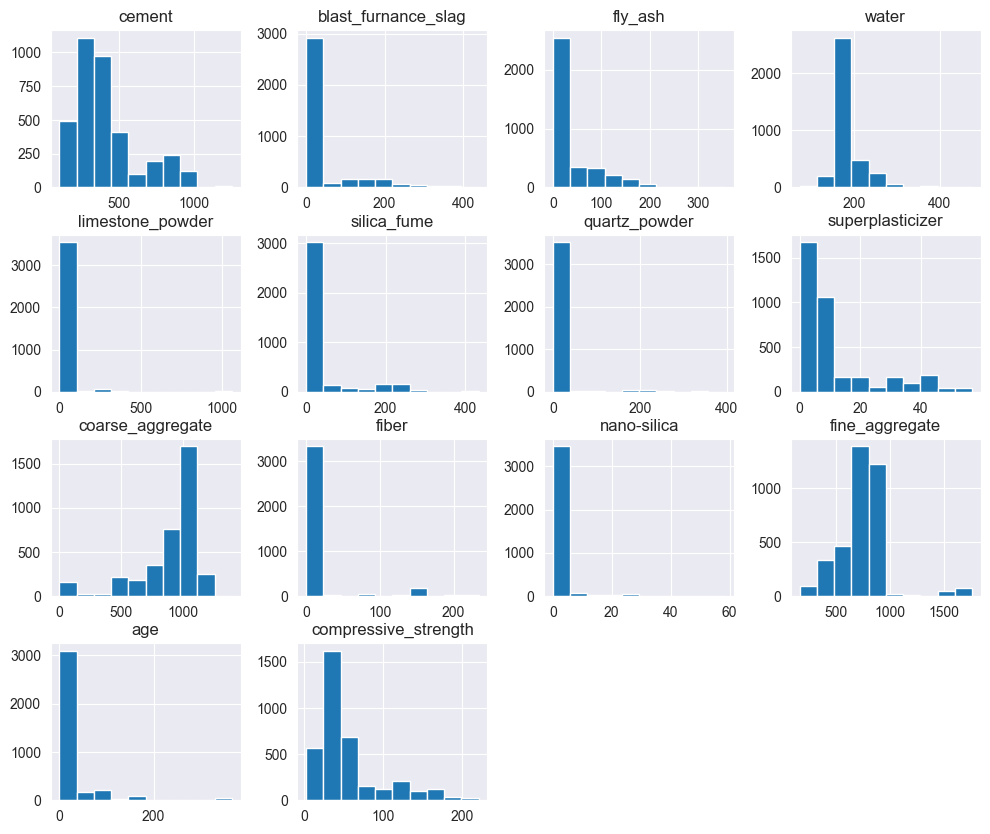

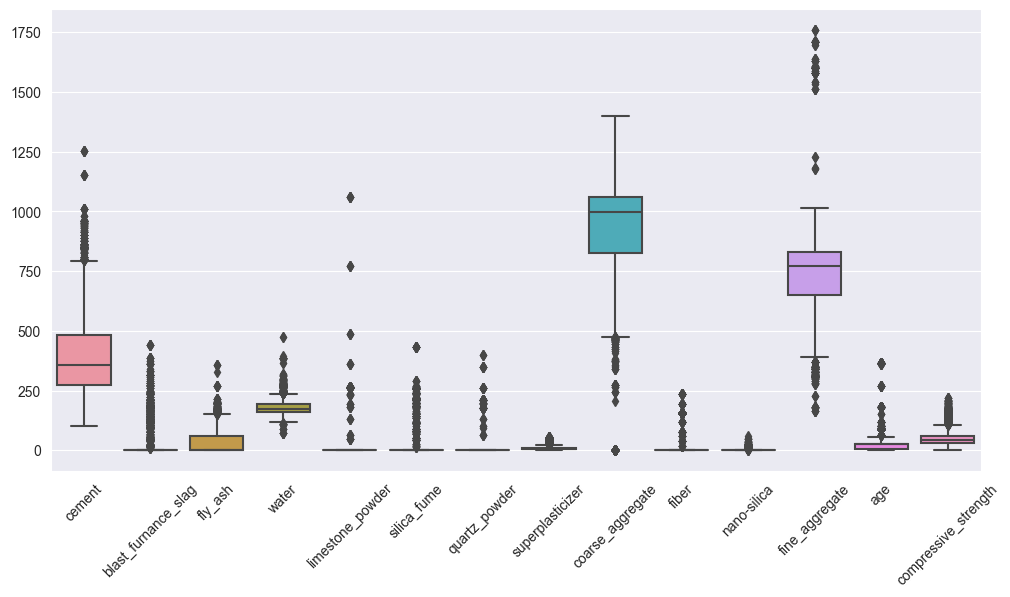

In [77]:
# Histograms for numerical features
data.hist(figsize=(12,10))
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

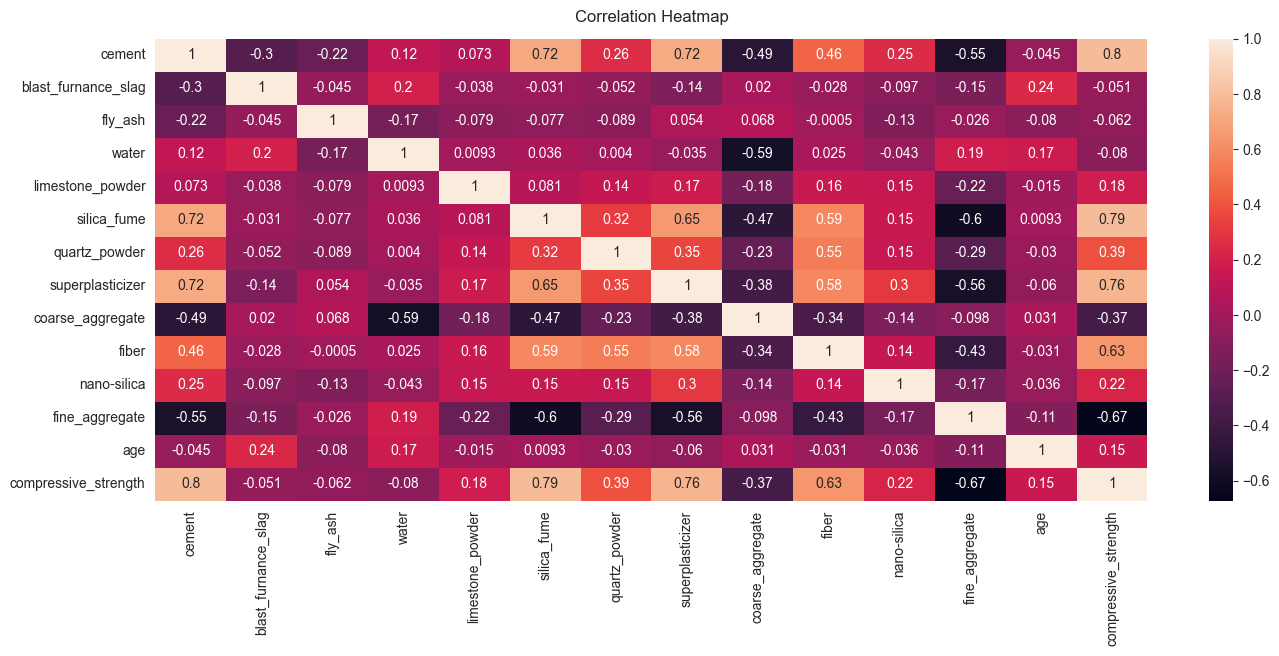

In [78]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [79]:
data.columns = data.columns.str.strip()



In [81]:
print(data.columns)

Index(['cement', 'blast_furnance_slag', 'fly_ash', 'water', 'limestone_powder',
       'silica_fume', 'quartz_powder', 'superplasticizer', 'coarse_aggregate',
       'fiber', 'nano-silica', 'fine_aggregate', 'age',
       'compressive_strength'],
      dtype='object')


In [83]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
target_column = 'compressive_strength'
feature_columns = [
    'cement', 'blast_furnance_slag', 'fly_ash', 'water', 'limestone_powder',
    'silica_fume', 'quartz_powder', 'superplasticizer', 'coarse_aggregate',
    'fiber', 'nano-silica', 'fine_aggregate', 'age'
]
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(train_data[feature_columns], train_data[target_column])
xgb_predictions = xgb_model.predict(test_data[feature_columns])
xgb_test_rmse = np.sqrt(mean_squared_error(test_data[target_column], xgb_predictions))
xgb_train_rmse = np.sqrt(mean_squared_error(train_data[target_column], xgb_model.predict(train_data[feature_columns])))

print(f"XGBoost Train RMSE: {xgb_train_rmse:.4f}")
print(f"XGBoost Test RMSE: {xgb_test_rmse:.4f}")

XGBoost Train RMSE: 2.3380
XGBoost Test RMSE: 5.6313


In [17]:
# Load your dataset
data = pd.read_csv('litconcdata.csv')
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Define target and feature columns
target_column = 'compressive_strength'
feature_columns = [
    'cement', 'blast_furnance_slag', 'fly_ash', 'water', 'limestone_powder',
    'silica_fume', 'quartz_powder', 'superplasticizer', 'coarse_aggregate',
    'fiber', 'nano-silica', 'fine_aggregate', 'age'
]

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)

    model.fit(train_data[feature_columns], train_data[target_column])
    y_pred = model.predict(test_data[feature_columns])
    rmse = np.sqrt(mean_squared_error(test_data[target_column], y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 3, 0.01], [1000, 10, 0.3]),
    'gbr': ([100, 3, 0.01], [1000, 10, 0.3]),
    'svr': ([0.1, 0.01], [100, 1.0])  # C: [0.1, 100], epsilon: [0.01, 1.0]
}

# BBO Algorithm
num_generations = 30
population_size = 20

results = {}
for algo in bounds.keys():
    lb, ub = bounds[algo]
    num_params = len(lb)
    population = np.random.uniform(low=lb, high=ub, size=(population_size, num_params))
    best_solution = None
    best_rmse = float('inf')

    for generation in range(num_generations):
        fitness = np.array([objective(ind, algorithm=algo) for ind in population])

        min_rmse = np.min(fitness)
        if min_rmse < best_rmse:
            best_rmse = min_rmse
            best_solution = population[np.argmin(fitness)]

        for i in range(population_size):
            if np.random.rand() < 0.5:
                donor = population[np.random.randint(0, population_size)]
                population[i] = np.clip(population[i] + np.random.rand() * (donor - population[i]), lb, ub)

        mutation_rate = 0.1
        for i in range(population_size):
            if np.random.rand() < mutation_rate:
                population[i] = np.clip(population[i] + np.random.normal(0, 0.1, size=num_params), lb, ub)

        print(f"{algo.upper()} - Generation {generation + 1}/{num_generations}, Best RMSE: {best_rmse:.4f}")

    results[algo] = {'best_params': best_solution, 'best_rmse': best_rmse}

# Print the best parameters and RMSE for each algorithm
for algo, result in results.items():
    print(f"\nAlgorithm: {algo.upper()}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best RMSE: {result['best_rmse']}")

# Determine the best algorithm based on RMSE
best_algo = min(results, key=lambda k: results[k]['best_rmse'])
print(f"\nThe best algorithm is {best_algo.upper()} with an RMSE of {results[best_algo]['best_rmse']:.4f}")


LGBM - Generation 1/30, Best RMSE: 4.7280
LGBM - Generation 2/30, Best RMSE: 4.7280
LGBM - Generation 3/30, Best RMSE: 4.7280
LGBM - Generation 4/30, Best RMSE: 4.7280
LGBM - Generation 5/30, Best RMSE: 4.7280
LGBM - Generation 6/30, Best RMSE: 4.7280
LGBM - Generation 7/30, Best RMSE: 4.7280
LGBM - Generation 8/30, Best RMSE: 4.7280
LGBM - Generation 9/30, Best RMSE: 4.7280
LGBM - Generation 10/30, Best RMSE: 4.7280
LGBM - Generation 11/30, Best RMSE: 4.7280
LGBM - Generation 12/30, Best RMSE: 4.7280
LGBM - Generation 13/30, Best RMSE: 4.7280
LGBM - Generation 14/30, Best RMSE: 4.7280
LGBM - Generation 15/30, Best RMSE: 4.7280
LGBM - Generation 16/30, Best RMSE: 4.7280
LGBM - Generation 17/30, Best RMSE: 4.7280
LGBM - Generation 18/30, Best RMSE: 4.7280
LGBM - Generation 19/30, Best RMSE: 4.7280
LGBM - Generation 20/30, Best RMSE: 4.7280
LGBM - Generation 21/30, Best RMSE: 4.7280
LGBM - Generation 22/30, Best RMSE: 4.7280
LGBM - Generation 23/30, Best RMSE: 4.7280
LGBM - Generation 24

In [22]:



# Define target and feature columns
target_column = 'compressive_strength'
feature_columns = [
    'cement', 'blast_furnance_slag', 'fly_ash', 'water', 'limestone_powder',
    'silica_fume', 'quartz_powder', 'superplasticizer', 'coarse_aggregate',
    'fiber', 'nano-silica', 'fine_aggregate', 'age'
]

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the objective function for PSO
def objective(params, algorithm='lgbm'):
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)

    # Fit the model on the training data
    model.fit(train_data[feature_columns], train_data[target_column])

    # Predict on the test data
    y_pred = model.predict(test_data[feature_columns])

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data[target_column], y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),  # n_estimators and learning_rate
    'svr': ([0.1, 0.01], [10, 1]),           # C and epsilon
}

# Run PSO for each algorithm
results = {}
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    best_params, best_rmse = pso(lambda params: objective(params, algorithm=algo), lb, ub, swarmsize=10, maxiter=20)
    results[algo] = {'best_params': best_params, 'best_rmse': best_rmse}

# Print the best parameters and RMSE for each algorithm
for algo, result in results.items():
    print(f"Algorithm: {algo.upper()}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best RMSE: {result['best_rmse']}")
    print()

# Determine the best algorithm based on RMSE
best_algo = min(results, key=lambda k: results[k]['best_rmse'])
print(f"The best algorithm is {best_algo.upper()} with an RMSE of {results[best_algo]['best_rmse']}")


Stopping search: maximum iterations reached --> 20
Stopping search: maximum iterations reached --> 20
Stopping search: maximum iterations reached --> 20
Stopping search: maximum iterations reached --> 20
Stopping search: maximum iterations reached --> 20
Algorithm: LGBM
Best Parameters: [9.91022143e+02 7.60941839e+00 1.63258917e-01]
Best RMSE: 4.691359026062155

Algorithm: RF
Best Parameters: [390.18789621  10.        ]
Best RMSE: 5.886212470718593

Algorithm: XGB
Best Parameters: [6.98405655e+02 8.01507884e+00 1.55173591e-01]
Best RMSE: 4.383803302883854

Algorithm: CATBOOST
Best Parameters: [8.90934452e+02 2.01920319e-01]
Best RMSE: 4.665617632273968

Algorithm: SVR
Best Parameters: [10.          0.45353147]
Best RMSE: 15.122967286351491

The best algorithm is XGB with an RMSE of 4.383803302883854


In [23]:
# Define target and feature columns
target_column = 'compressive_strength'
feature_columns = [
    'cement', 'blast_furnance_slag', 'fly_ash', 'water', 'limestone_powder',
    'silica_fume', 'quartz_powder', 'superplasticizer', 'coarse_aggregate',
    'fiber', 'nano-silica', 'fine_aggregate', 'age'
]

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)

    # Fit the model on the training data
    model.fit(train_data[feature_columns], train_data[target_column])

    # Predict on the test data
    y_pred = model.predict(test_data[feature_columns])

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data[target_column], y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),
    'svr': ([0.1, 0.01], [10, 1]),
}

# ACO Implementation
def aco(objective_func, lb, ub, num_ants=20, num_iterations=30):
    num_params = len(lb)
    pheromone = np.ones((num_params,))
    best_solution = None
    best_rmse = float('inf')

    for iteration in range(num_iterations):
        solutions = []
        fitness = []

        for ant in range(num_ants):
            # Generate a solution based on pheromone levels
            solution = [np.random.uniform(lb[i], ub[i]) for i in range(num_params)]
            rmse = objective_func(solution)
            solutions.append(solution)
            fitness.append(rmse)

        # Update pheromone based on fitness (lower RMSE increases pheromone)
        for i in range(num_params):
            pheromone[i] += 1.0 / (1.0 + np.min(fitness))
        
        # Evaporation
        pheromone *= 0.9

        # Find the best solution in this iteration
        min_rmse = np.min(fitness)
        if min_rmse < best_rmse:
            best_rmse = min_rmse
            best_solution = solutions[np.argmin(fitness)]
        
        print(f"Iteration {iteration + 1}/{num_iterations}, Best RMSE: {best_rmse:.4f}")
    
    return best_solution, best_rmse

# Run ACO for each algorithm
results = {}
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    best_params, best_rmse = aco(lambda params: objective(params, algorithm=algo), lb, ub)
    results[algo] = {'best_params': best_params, 'best_rmse': best_rmse}

# Print the best parameters and RMSE for each algorithm
for algo, result in results.items():
    print(f"Algorithm: {algo.upper()}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best RMSE: {result['best_rmse']:.4f}")
    print()

# Determine the best algorithm based on RMSE
best_algo = min(results, key=lambda k: results[k]['best_rmse'])
print(f"The best algorithm is {best_algo.upper()} with an RMSE of {results[best_algo]['best_rmse']:.4f}")


Iteration 1/30, Best RMSE: 4.7633
Iteration 2/30, Best RMSE: 4.7633
Iteration 3/30, Best RMSE: 4.7633
Iteration 4/30, Best RMSE: 4.7633
Iteration 5/30, Best RMSE: 4.6477
Iteration 6/30, Best RMSE: 4.6477
Iteration 7/30, Best RMSE: 4.6477
Iteration 8/30, Best RMSE: 4.6477
Iteration 9/30, Best RMSE: 4.6477
Iteration 10/30, Best RMSE: 4.6477
Iteration 11/30, Best RMSE: 4.6477
Iteration 12/30, Best RMSE: 4.6477
Iteration 13/30, Best RMSE: 4.6477
Iteration 14/30, Best RMSE: 4.6477
Iteration 15/30, Best RMSE: 4.6477
Iteration 16/30, Best RMSE: 4.6477
Iteration 17/30, Best RMSE: 4.6477
Iteration 18/30, Best RMSE: 4.6477
Iteration 19/30, Best RMSE: 4.6477
Iteration 20/30, Best RMSE: 4.6477
Iteration 21/30, Best RMSE: 4.6477
Iteration 22/30, Best RMSE: 4.6477
Iteration 23/30, Best RMSE: 4.6477
Iteration 24/30, Best RMSE: 4.6477
Iteration 25/30, Best RMSE: 4.6477
Iteration 26/30, Best RMSE: 4.6477
Iteration 27/30, Best RMSE: 4.6477
Iteration 28/30, Best RMSE: 4.6477
Iteration 29/30, Best RMSE: 4

In [ ]:
target_column = 'compressive_strength'
feature_columns = [
    'cement', 'blast_furnance_slag', 'fly_ash', 'water', 'limestone_powder',
    'silica_fume', 'quartz_powder', 'superplasticizer', 'coarse_aggregate',
    'fiber', 'nano-silica', 'fine_aggregate', 'age'
]

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Objective function to minimize (Test RMSE)
def objective(params, algorithm='lgbm'):
    # Create model based on algorithm and parameters
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    # Fit the model on training data
    model.fit(train_data[feature_columns], train_data[target_column])
    
    # Predict on test data
    y_pred = model.predict(test_data[feature_columns])
    rmse = np.sqrt(mean_squared_error(test_data[target_column], y_pred))
    return rmse

# Firefly Algorithm for hyperparameter optimization
def firefly_algorithm(objective_func, lb, ub, num_fireflies=20, max_iter=15, alpha=0.5, beta0=1, gamma=1):
    num_params = len(lb)
    # Initialize fireflies randomly within bounds
    fireflies = np.random.uniform(low=lb, high=ub, size=(num_fireflies, num_params))
    fitness = np.array([objective_func(f) for f in fireflies])
    
    for iteration in range(max_iter):
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if fitness[j] < fitness[i]:  # Move firefly i towards j if j is brighter (i.e., lower RMSE)
                    distance = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta = beta0 * np.exp(-gamma * distance ** 2)
                    fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(num_params) - 0.5)
                    # Ensure firefly remains within bounds
                    fireflies[i] = np.clip(fireflies[i], lb, ub)
                    fitness[i] = objective_func(fireflies[i])
                    
        # Reduce randomness over iterations
        alpha *= 0.9
        print(f"Iteration {iteration + 1}/{max_iter}, Best Test RMSE so far: {np.min(fitness):.4f}")
    
    best_index = np.argmin(fitness)
    return fireflies[best_index], fitness[best_index]

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),
    'svr': ([0.1, 0.01], [10, 1]),
}

# Container to hold the results
results = {}

# Optimize hyperparameters for each algorithm using the Firefly Algorithm
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    print(f"\nOptimizing hyperparameters for {algo.upper()}...")
    best_params, best_rmse = firefly_algorithm(lambda params: objective(params, algorithm=algo), lb, ub)
    results[algo] = {'best_params': best_params, 'best_test_rmse': best_rmse}

# Function to evaluate model with given hyperparameters and return both train and test RMSE
def evaluate_model(algorithm, params):
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    model.fit(train_data[feature_columns], train_data[target_column])
    
    # Predictions for training and test data
    y_train_pred = model.predict(train_data[feature_columns])
    y_test_pred = model.predict(test_data[feature_columns])
    
    train_rmse = np.sqrt(mean_squared_error(train_data[target_column], y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(test_data[target_column], y_test_pred))
    
    return train_rmse, test_rmse

# Evaluate and print detailed results for each algorithm
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    train_rmse, test_rmse = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse:.4f}\n")
    results[algo].update({'train_rmse': train_rmse, 'test_rmse': test_rmse})

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")



Optimizing hyperparameters for LGBM...
Iteration 1/30, Best Test RMSE so far: 4.7248
Iteration 2/30, Best Test RMSE so far: 4.6969
Iteration 3/30, Best Test RMSE so far: 4.6969
Iteration 4/30, Best Test RMSE so far: 4.6969
Iteration 5/30, Best Test RMSE so far: 4.6969
Iteration 6/30, Best Test RMSE so far: 4.6969
Iteration 7/30, Best Test RMSE so far: 4.6969
Iteration 8/30, Best Test RMSE so far: 4.6865
Iteration 9/30, Best Test RMSE so far: 4.6865
Iteration 10/30, Best Test RMSE so far: 4.6865
Iteration 11/30, Best Test RMSE so far: 4.6449
Iteration 12/30, Best Test RMSE so far: 4.6449
Iteration 13/30, Best Test RMSE so far: 4.6449
Iteration 14/30, Best Test RMSE so far: 4.6349
Iteration 15/30, Best Test RMSE so far: 4.5552
Iteration 16/30, Best Test RMSE so far: 4.5552
Iteration 17/30, Best Test RMSE so far: 4.5552
Iteration 18/30, Best Test RMSE so far: 4.5552
Iteration 19/30, Best Test RMSE so far: 4.5552
Iteration 20/30, Best Test RMSE so far: 4.5552
Iteration 21/30, Best Test RM

In [27]:

# Define target and feature columns
target_column = 'compressive_strength'
feature_columns = [
    'cement', 'blast_furnance_slag', 'fly_ash', 'water', 'limestone_powder',
    'silica_fume', 'quartz_powder', 'superplasticizer', 'coarse_aggregate',
    'fiber', 'nano-silica', 'fine_aggregate', 'age'
]

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Objective function to minimize (Test RMSE)
def objective(params, algorithm='lgbm'):
    # Create model based on algorithm and parameters
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    # Fit the model on training data
    model.fit(train_data[feature_columns], train_data[target_column])
    
    # Predict on test data
    y_pred = model.predict(test_data[feature_columns])
    rmse = np.sqrt(mean_squared_error(test_data[target_column], y_pred))
    return rmse

# -------------------------------
# Bee Algorithm for hyperparameter optimization
# -------------------------------
# Bee Algorithm for hyperparameter optimization (remains largely the same)
def bee_algorithm(objective_func, lb, ub, num_bees=20, max_iter=15, num_best=5, patch_size=0.1, num_recruited=5):
    num_params = len(lb)
    bees = np.random.uniform(low=lb, high=ub, size=(num_bees, num_params))
    fitness = np.array([objective_func(bee) for bee in bees])
    current_patch_size = patch_size

    for iteration in range(max_iter):
        sorted_indices = np.argsort(fitness)
        bees = bees[sorted_indices]
        fitness = fitness[sorted_indices]
        best_fitness = fitness[0]
        
        new_bees = []
        new_fitness = []
        for i in range(num_best):
            best_bee = bees[i]
            best_bee_fitness = fitness[i]
            for _ in range(num_recruited):
                candidate = best_bee + current_patch_size * (np.random.uniform(-1, 1, num_params))
                candidate = np.clip(candidate, lb, ub)
                candidate_fitness = objective_func(candidate)
                if candidate_fitness < best_bee_fitness:
                    best_bee = candidate
                    best_bee_fitness = candidate_fitness
            new_bees.append(best_bee)
            new_fitness.append(best_bee_fitness)
        
        remaining = num_bees - len(new_bees)
        scouts = np.random.uniform(low=lb, high=ub, size=(remaining, num_params))
        scouts_fitness = np.array([objective_func(bee) for bee in scouts])
        
        bees = np.vstack([np.array(new_bees), scouts])
        fitness = np.concatenate([np.array(new_fitness), scouts_fitness])
        
        current_patch_size *= 0.95
        
        print(f"Iteration {iteration + 1}/{max_iter}, Best CV RMSE so far: {np.min(fitness):.4f}")
    
    best_index = np.argmin(fitness)
    return bees[best_index], fitness[best_index]


# -------------------------------
# Define bounds for hyperparameters for each algorithm
# -------------------------------
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),
    'svr': ([0.1, 0.01], [10, 1]),
}

# Container to hold the results
results = {}

# Optimize hyperparameters for each algorithm using the Bee Algorithm
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    print(f"\nOptimizing hyperparameters for {algo.upper()} using Bee Algorithm...")
    best_params, best_rmse = bee_algorithm(lambda params: objective(params, algorithm=algo), lb, ub)
    results[algo] = {'best_params': best_params, 'best_test_rmse': best_rmse}

# -------------------------------
# Function to evaluate model with given hyperparameters and return both train and test RMSE
# -------------------------------
def evaluate_model(algorithm, params):
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    model.fit(train_data[feature_columns], train_data[target_column])
    
    # Predictions for training and test data
    y_train_pred = model.predict(train_data[feature_columns])
    y_test_pred = model.predict(test_data[feature_columns])
    
    train_rmse = np.sqrt(mean_squared_error(train_data[target_column], y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(test_data[target_column], y_test_pred))
    
    return train_rmse, test_rmse

# -------------------------------
# Evaluate and print detailed results for each algorithm
# -------------------------------
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    train_rmse, test_rmse = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse:.4f}\n")
    results[algo].update({'train_rmse': train_rmse, 'test_rmse': test_rmse})

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")



Optimizing hyperparameters for LGBM using Bee Algorithm...
Iteration 1/15, Best CV RMSE so far: 4.6935
Iteration 2/15, Best CV RMSE so far: 4.6554
Iteration 3/15, Best CV RMSE so far: 4.6554
Iteration 4/15, Best CV RMSE so far: 4.6554
Iteration 5/15, Best CV RMSE so far: 4.6554
Iteration 6/15, Best CV RMSE so far: 4.6554
Iteration 7/15, Best CV RMSE so far: 4.6554
Iteration 8/15, Best CV RMSE so far: 4.6554
Iteration 9/15, Best CV RMSE so far: 4.6554
Iteration 10/15, Best CV RMSE so far: 4.6554
Iteration 11/15, Best CV RMSE so far: 4.5243
Iteration 12/15, Best CV RMSE so far: 4.5243
Iteration 13/15, Best CV RMSE so far: 4.5243
Iteration 14/15, Best CV RMSE so far: 4.5243
Iteration 15/15, Best CV RMSE so far: 4.5243

Optimizing hyperparameters for RF using Bee Algorithm...
Iteration 1/15, Best CV RMSE so far: 6.2540
Iteration 2/15, Best CV RMSE so far: 6.2540
Iteration 3/15, Best CV RMSE so far: 6.2540
Iteration 4/15, Best CV RMSE so far: 6.2540
Iteration 5/15, Best CV RMSE so far: 6.2